In [1]:
import numpy as np
import matplotlib.pyplot as plt
#--------------------------------------------
## Import functions to simulate Markov chains from file cmtcFunc.py
from cmtcFunc import sampleState,simCTMC,pltTauMatrix,computePCFunc,computeProbStates,computeProbStatesFromSim

## Simulate five states

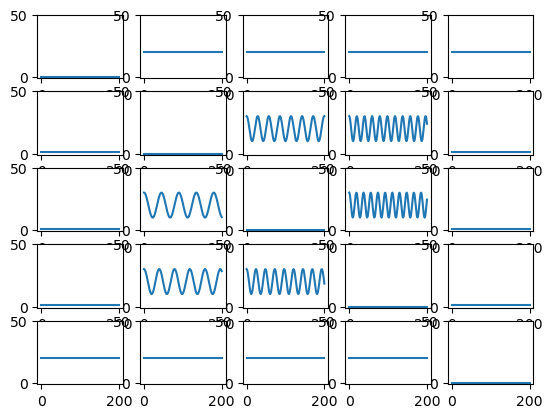

In [2]:
## Number of states
N=5

## Probailities for the initial state
p0=[0.02,0.32,0.32,0.32,0.02]

## Values associated with each state
stateVal=np.array([0.09,0.118,0.12,0.122,0.15])
## Nominal value
Xnom=0.12

## Time horizon
Tmax=200

## Number of samples
nsamples=2001

## Definition of transition rates
eps=0.05
tstar=20
def tauMat(t,i,j):
    if i==0:
        return 0 if j==i else tstar
    elif i==N-1:
        return 0 if j==i else tstar
    else:
        return 0 if j==i else eps*tstar if (j==0)or(j==N-1) else tstar*(10*eps+np.abs(np.cos(0.01*t*(i+j*N)))**2)

## Plot transtition rates
plotTauMat=True
Tseq=np.linspace(0,Tmax,Tmax+1)
ylim=[-1,50]
if plotTauMat:
    pltTauMatrix(tauMat,N,Tseq,ylim,plotLegend=False)

/home/curry/anaconda3/envs/MeanNO/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


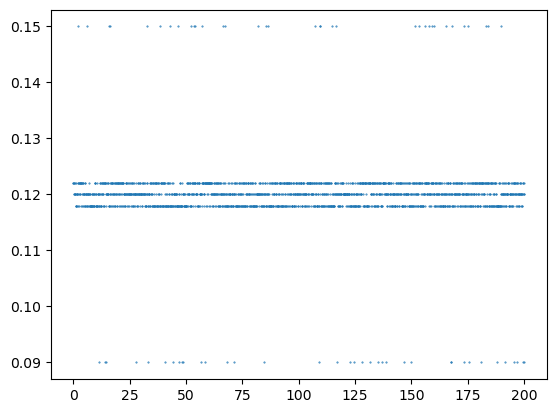

In [3]:
## Simulate MC
i0=sampleState(p0)
simMC=simCTMC(Tmax=Tmax,N=N,i0=i0,tauMat=tauMat)

## Plot simulation
Tseq=np.linspace(0,Tmax,nsamples)
simTseq=computePCFunc(Tseq,simMC,stateVal)
plt.scatter(Tseq,simTseq,s=0.2)
plt.show()

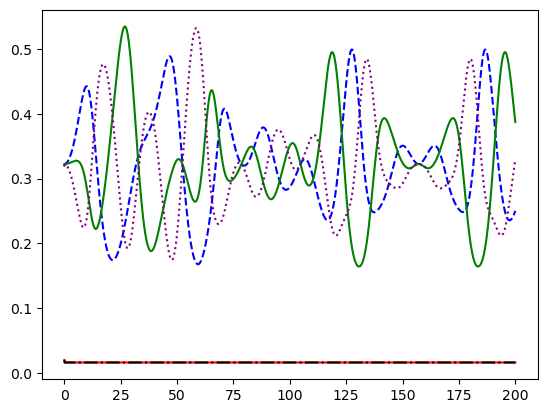

In [4]:
## Compute state probabilities through time
TseqPS=np.linspace(0,Tmax,nsamples)
pStates=computeProbStates(TseqPS,tauMat,N,p0)


colorlist=["red","blue","green","purple","black"]
linestyles=["-","--","-",":","-."]
legendlist=["State "+str(k) for k in range(N)]
## Plot
for k in range(N):
    plt.plot(TseqPS,pStates[k],label=legendlist[k],color=colorlist[k],linestyle=linestyles[k])
# plt.legend()
plt.show()


In [5]:
## Save data to file

np.save("/home/curry/Documents/NOMeanSquare/data/simTseq.npy",simTseq)
np.save("/home/curry/Documents/NOMeanSquare/data/Tseq.npy",Tseq)
np.save("/home/curry/Documents/NOMeanSquare/data/pStates.npy",pStates)